In [1]:
# load packages
import os
import csv

import numpy as np 
import pandas as pd 
import itertools
import re

import gensim
from gensim import models
from gensim import corpora
from gensim.utils import simple_preprocess
from collections import defaultdict

from nltk.stem import SnowballStemmer   
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
# Load tweets data
data = pd.read_csv("data/all_english_tweets_preprocessed.csv",lineterminator='\n')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022257 entries, 0 to 2022256
Data columns (total 25 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Unnamed: 0      int64 
 1   Unnamed: 0.1    int64 
 2   userid          int64 
 3   username        object
 4   acctdesc        object
 5   location        object
 6   following       int64 
 7   followers       int64 
 8   totaltweets     int64 
 9   usercreatedts   object
 10  tweetid         int64 
 11  tweetcreatedts  object
 12  retweetcount    int64 
 13  text            object
 14  hashtags        object
 15  language        object
 16  coordinates     object
 17  favorite_count  int64 
 18  extractedts     object
 19  timestamp       object
 20  hashtags_words  object
 21  timestamp_H     int64 
 22  timestamp_M     int64 
 23  cleaned_text    object
 24  tokenized_text  object
dtypes: int64(11), object(14)
memory usage: 385.7+ MB


In [4]:
data.head()

,Unnamed: 0,Unnamed: 0.1,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,...,language,coordinates,favorite_count,extractedts,timestamp,hashtags_words,timestamp_H,timestamp_M,cleaned_text,tokenized_text
0,0,357018,962369743,toonspt_,พยรลก 😉\nจะเปิดแอคเมื่อขายของเท่านั้น!!,NaN,462,7,20549,2012-11-21 13:01:19.000000,...,en,NaN,0,2022-02-24 06:51:34.430620,24-02-2022,Ukraine Russia,6,48,footage of the airport bombing in ivano franki...,"['footage', 'airport', 'bombing', 'ivano', 'fr..."
1,1,357021,1073676020,IndiaTodayFLASH,No dragging feet on news. Crisp & short news s...,NaN,117,1152610,589066,2013-01-09 12:46:38.000000,...,en,NaN,0,2022-02-24 06:51:34.403108,24-02-2022,ITVideo,6,48,ukraine mp sophia fedyna tells about the groun...,"['ukraine', 'mp', 'sophia', 'fedyna', 'tells',..."
2,2,357023,1040140500718837760,Areopagiet,Dᴀᴅ ღ Pʜɪ & Qᴜɪ /Pᴀʀᴛɴᴇʀ | Aᴛʜᴇɪsᴛ | ADD /ASS ...,EU v2.0,5008,267,9894,2018-09-13 07:29:55.000000,...,en,NaN,0,2022-02-24 06:51:34.384864,24-02-2022,Ukraine Russia,6,48,a cruise missile fired by the russian army fel...,"['cruise', 'missile', 'fired', 'russian', 'arm..."
3,3,357031,3821643918,Sicarius130,Christie // 刀剣乱舞 (izmt+mtiz for life) + 2.5D (...,Hong Kong,459,272,57829,2015-10-08 04:49:27.000000,...,en,NaN,0,2022-02-24 06:51:34.311760,24-02-2022,Ukraine Russia,6,48,spread and share you can help ukraine ukraine ...,"['spread', 'share', 'help', 'ukraine', 'ukrain..."
4,4,357034,485905284,TheAAntagonist,T.A.A | The handwriting on the wall: LIVE by t...,Omnipresent,12061,13484,813,2012-02-07 18:10:59.000000,...,en,NaN,0,2022-02-24 06:51:34.284328,24-02-2022,Putin Ukraine,6,48,now this is wrong absolutely wrong for joebide...,"['wrong', 'absolutely', 'wrong', 'joebiden', '..."


# Word2Vec

In [5]:
def tokenize(text):
    tokens = re.split(r'\W+', text)
    return tokens
corpus_data=data["cleaned_text"].astype(str).apply(tokenize)

In [6]:
corpus_data

0          [footage, of, the, airport, bombing, in, ivano...
1          [ukraine, mp, sophia, fedyna, tells, about, th...
2          [a, cruise, missile, fired, by, the, russian, ...
3          [spread, and, share, you, can, help, ukraine, ...
4          [now, this, is, wrong, absolutely, wrong, for,...
                                 ...                        
2022252    [us, javelins, breaks, the, all, time, destroy...
2022253    [russian, rock, singer, chicherina, cuts, ukra...
2022254    [monday, march, confirmation, hearings, for, s...
2022255    [for, four, years, the, actor, comedian, volod...
2022256    [when, the, volumes, of, hell, are, opened, fo...
Name: cleaned_text, Length: 2022257, dtype: object

In [7]:
corpus_list=corpus_data.tolist()
model = gensim.models.Word2Vec(corpus_list, min_count=10, vector_size=100)

In [14]:
print(np.asarray(model.wv.vectors).shape)

(70734, 100)


In [15]:
for index, word in enumerate(model.wv.index_to_key):
    if index==30:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/70734 is the
word #1/70734 is ukraine
word #2/70734 is http
word #3/70734 is to
word #4/70734 is of
word #5/70734 is and
word #6/70734 is in
word #7/70734 is russia
word #8/70734 is a
word #9/70734 is is
word #10/70734 is putin
word #11/70734 is s
word #12/70734 is for
word #13/70734 is on
word #14/70734 is russian
word #15/70734 is are
word #16/70734 is war
word #17/70734 is you
word #18/70734 is this
word #19/70734 is it
word #20/70734 is with
word #21/70734 is that
word #22/70734 is t
word #23/70734 is i
word #24/70734 is from
word #25/70734 is we
word #26/70734 is will
word #27/70734 is be
word #28/70734 is not
word #29/70734 is nato


In [16]:
print(model.predict_output_word(['putin'], topn = 50))

[('vladimir', 0.063563876), ('warcriminal', 0.05103124), ('criminal', 0.028671557), ('putinstinypenis', 0.014034401), ('xijinping', 0.008687633), ('murderer', 0.0063898275), ('overthrow', 0.0063289437), ('butcher', 0.0047933627), ('mr', 0.004119915), ('apologist', 0.0036794331), ('supporter', 0.0036292146), ('thug', 0.0034407047), ('xi', 0.003414002), ('depose', 0.0030470502), ('loves', 0.0029397465), ('murderous', 0.0027125655), ('hates', 0.0026879597), ('apologists', 0.0026050438), ('emboldened', 0.0025114117), ('wants', 0.0023230917), ('adolf', 0.0020027466), ('lover', 0.0019614387), ('psychopath', 0.0019580375), ('lukashenko', 0.0017857046), ('swar', 0.0017846134), ('dictator', 0.0017739079), ('unhinged', 0.00175568), ('evil', 0.0017292394), ('emboldening', 0.0016952568), ('asshole', 0.001669219), ('fuck', 0.0016519328), ('russland', 0.0015160278), ('confront', 0.0014426997), ('rasputin', 0.0013997578), ('miscalculated', 0.0013674113), ('stalin', 0.0013400859), ('enabling', 0.00132

In [17]:
print(model.predict_output_word(['zelensky'], topn = 50))

[('volodymyr', 0.99888706), ('pres', 0.0005959887), ('president', 0.00027267207), ('zelenskyy', 2.1775404e-05), ('zelenskyyuaaa', 8.971808e-06), ('zelenskywarcriminal', 8.525716e-06), ('zelenskiy', 7.4677446e-06), ('zelensky', 7.018074e-06), ('volodymr', 6.866342e-06), ('yidiot', 6.1465935e-06), ('kyivnow', 5.280814e-06), ('vitaliklitschko', 3.9554243e-06), ('surrender', 3.6393092e-06), ('prez', 3.1825434e-06), ('menikmati', 2.6261278e-06), ('volodymir', 2.4801159e-06), ('zelenski', 2.4734372e-06), ('volodimir', 2.3305465e-06), ('puppet', 2.2776194e-06), ('speech', 2.2494607e-06), ('pleads', 2.115637e-06), ('volodymyrzelenskyy', 2.1123265e-06), ('volodymyrzelensky', 2.111237e-06), ('accuses', 2.0723508e-06), ('jew', 2.0440966e-06), ('klitschko', 2.0380885e-06), ('comedian', 1.9314775e-06), ('hero', 1.8192911e-06), ('volodomyr', 1.6984801e-06), ('zelenskyj', 1.6841755e-06), ('zelenksy', 1.5210246e-06), ('zelenskyyisahero', 1.3864508e-06), ('keepkyivfree', 1.3283349e-06), ('slams', 1.308

In [18]:
print(model.predict_output_word(['sanction'], topn = 50))

[('imposed', 0.53794503), ('imposing', 0.24479872), ('impose', 0.13921632), ('tighten', 0.009280322), ('imposes', 0.0053209015), ('unilateral', 0.002927617), ('tougher', 0.0028952786), ('loophole', 0.0026474732), ('russianoil', 0.0024541044), ('evade', 0.001886849), ('stricter', 0.001130201), ('package', 0.0011233169), ('sanction', 0.0011021375), ('slapped', 0.0010697764), ('oligarchs', 0.0010484084), ('crippling', 0.0010142827), ('circumvent', 0.00091247406), ('lifted', 0.00083385804), ('harshest', 0.0008108575), ('abramovich', 0.0006669907), ('boycotts', 0.00062731333), ('refusing', 0.00057505374), ('sanctionsrussianow', 0.00053896924), ('economic', 0.00051997526), ('banks', 0.0005073046), ('list', 0.0004940556), ('evading', 0.00049218815), ('swift', 0.00046740816), ('sanctioned', 0.0004542109), ('deripaska', 0.00043927386), ('romanabramovich', 0.00042322176), ('saudi', 0.0004220348), ('russianoligarchs', 0.00038287352), ('oligarch', 0.00034681585), ('sanctionrussianow', 0.0003440601

In [19]:
print(model.predict_output_word(['humanitarian'], topn = 50))

[('corridors', 0.9997659), ('corridor', 0.00019729193), ('aid', 2.0278763e-05), ('assistance', 1.5933872e-05), ('catastrophe', 6.0072983e-07), ('airlift', 1.49883e-09), ('crisis', 1.1911995e-09), ('efforts', 5.2169546e-10), ('crises', 4.865269e-10), ('cargo', 3.449321e-10), ('convoys', 1.5041458e-10), ('disasters', 1.4954381e-10), ('grounds', 1.01958234e-10), ('disaster', 8.227872e-11), ('facilitate', 4.5293467e-11), ('purposes', 2.861081e-11), ('blockade', 2.8229766e-11), ('access', 2.3439058e-11), ('relief', 2.1117665e-11), ('routes', 1.8028924e-11), ('daysoftigraygenocide', 1.4321983e-11), ('aids', 1.0397468e-11), ('effort', 9.879356e-12), ('supplies', 9.74778e-12), ('convoy', 8.661037e-12), ('organize', 8.535938e-12), ('needs', 8.457855e-12), ('aide', 8.184238e-12), ('violations', 7.3041035e-12), ('appeal', 6.1451014e-12), ('population', 5.833235e-12), ('aspects', 5.6357185e-12), ('provide', 5.5134027e-12), ('organizations', 4.566976e-12), ('emergency', 3.5072336e-12), ('evacuation

In [20]:
print(model.predict_output_word(['economic'], topn = 50))

[('economic', 0.8062269), ('measures', 0.04728234), ('collapse', 0.024412248), ('sanctions', 0.021149376), ('recovery', 0.015303451), ('socio', 0.009587694), ('growth', 0.008006999), ('isolation', 0.007985197), ('stability', 0.006371098), ('severe', 0.0039496245), ('financial', 0.003643558), ('pressures', 0.0030847013), ('turmoil', 0.0021990163), ('repercussions', 0.0017893688), ('outlook', 0.0015754722), ('hardship', 0.0012979641), ('difficulties', 0.0010905225), ('blockade', 0.0009824298), ('trade', 0.0009584635), ('imposed', 0.00088980317), ('effects', 0.00088847696), ('warfare', 0.0008597054), ('monetary', 0.00085302815), ('recession', 0.000843913), ('fallout', 0.0008335825), ('restrictions', 0.0007299107), ('problems', 0.00067349826), ('crippling', 0.0006383514), ('impacts', 0.00051023206), ('depression', 0.00047881334), ('impact', 0.00047824174), ('ramifications', 0.0004748994), ('pressure', 0.00046801142), ('global', 0.0004675448), ('effect', 0.00042051132), ('relations', 0.0004

In [22]:
print(model.predict_output_word(['nuclear'], topn = 50))

[('plants', 0.9850622), ('warheads', 0.012446759), ('plant', 0.0011425924), ('weapons', 0.0010556293), ('weapon', 8.582201e-05), ('reactors', 5.7101126e-05), ('reactor', 5.5844383e-05), ('deterrent', 3.852845e-05), ('catastrophe', 2.6257587e-05), ('arsenal', 1.5785437e-05), ('facilities', 6.046339e-06), ('facility', 3.1239504e-06), ('threat', 2.3525245e-06), ('submarines', 4.905184e-07), ('armageddon', 3.1981622e-07), ('threats', 2.2310404e-07), ('disarmament', 1.1725662e-07), ('blackmail', 7.8979696e-08), ('arsenals', 7.456988e-08), ('chornobyl', 4.181727e-08), ('warfare', 4.119405e-08), ('deterrence', 3.9189356e-08), ('powered', 3.7712987e-08), ('warhead', 3.498198e-08), ('watchdog', 3.2094075e-08), ('threaten', 3.177942e-08), ('disaster', 3.0212743e-08), ('installations', 2.3228605e-08), ('powerplant', 2.209084e-08), ('proliferation', 1.9773001e-08), ('contamination', 1.9619481e-08), ('submarine', 1.6390425e-08), ('threatens', 1.3359293e-08), ('power', 1.2673984e-08), ('apocalypse',

In [23]:
print(model.predict_output_word(['attack'], topn = 50))

[('missile', 0.4039106), ('under', 0.21902575), ('rocket', 0.09723704), ('chemical', 0.06366753), ('an', 0.053322174), ('counter', 0.044005208), ('on', 0.03140951), ('unprovoked', 0.027642924), ('repelled', 0.009699684), ('preemptive', 0.008860355), ('ddos', 0.0054801963), ('cease', 0.0035407988), ('cyber', 0.0027642173), ('aerial', 0.0023643873), ('deadly', 0.002018229), ('widens', 0.0015610904), ('repel', 0.0014805162), ('missle', 0.0013461753), ('brutal', 0.0011164517), ('unlawful', 0.00095372496), ('precision', 0.0007571002), ('indiscriminate', 0.0006655832), ('relentless', 0.0004603166), ('renewed', 0.00042939608), ('deliberate', 0.00040168277), ('attempted', 0.00039533686), ('preparing', 0.00038109923), ('barbaric', 0.00037604987), ('biological', 0.0002816126), ('imminent', 0.0002806417), ('margie', 0.000274055), ('repulsed', 0.00023358532), ('intensifies', 0.00022269235), ('aftermath', 0.00020102801), ('helicopter', 0.00019804892), ('ruthless', 0.00018915215), ('unjustified', 0.

In [24]:
print(model.predict_output_word(['nato'], topn = 50))

[('expansion', 0.7305719), ('membership', 0.09527814), ('joining', 0.039877053), ('aircom', 0.01918136), ('usnato', 0.016654981), ('otan', 0.012457171), ('join', 0.008645519), ('member', 0.008321191), ('enlargement', 0.006210362), ('jensstoltenberg', 0.0038878575), ('eu', 0.0029890055), ('stoltenberg', 0.0025057024), ('marcom', 0.0023713834), ('expansionism', 0.0021218602), ('littlegreenmen', 0.0021218439), ('irenefellin', 0.0020018776), ('natopress', 0.0016821303), ('usa', 0.001416069), ('bases', 0.0010136609), ('natoinukrainenow', 0.0009958787), ('nspa', 0.00081279926), ('unitednations', 0.0007433464), ('usambnato', 0.0006833323), ('natocanada', 0.00051463884), ('natoclosethesky', 0.000490607), ('navo', 0.00046126888), ('shape', 0.00043646723), ('expanding', 0.00043552715), ('disband', 0.00042038402), ('natocountries', 0.0003872233), ('countries', 0.0003669728), ('expanded', 0.00035990786), ('europeanunion', 0.0003586052), ('encroachment', 0.0003567074), ('widereurope', 0.00032340837

In [25]:
print(model.predict_output_word(['migration'], topn = 50))

[('refugee', 0.09011246), ('migration', 0.07653377), ('refugees', 0.04943711), ('immigration', 0.023940664), ('migrants', 0.008815198), ('discrimination', 0.007191826), ('immigrants', 0.004733067), ('poverty', 0.0047054198), ('agency', 0.0043473965), ('crisis', 0.003556988), ('unhcr', 0.0034020573), ('climate', 0.0030747019), ('asylum', 0.003052609), ('policy', 0.0027398258), ('bill', 0.0025611436), ('housing', 0.0021597648), ('refugeeswelcome', 0.0021547964), ('diversity', 0.0019740474), ('exploitation', 0.0019204658), ('seekers', 0.0018446161), ('hub', 0.0018344753), ('reception', 0.0017881873), ('refugeecrisis', 0.0017627185), ('centres', 0.0017600174), ('racial', 0.0017428303), ('ukrainerefugees', 0.0016780163), ('humanrights', 0.0016538533), ('displacement', 0.0016318191), ('refuge', 0.0016262806), ('inclusion', 0.0016018571), ('integration', 0.0015994238), ('ukrainianrefugees', 0.0014606287), ('trafficking', 0.0014441779), ('nationalityandbordersbill', 0.0013740693), ('centre', 0

In [26]:
print(model.predict_output_word(['bombing'], topn = 50))

[('hospitals', 0.50141287), ('carpet', 0.30158642), ('indiscriminate', 0.17312227), ('civilians', 0.014258294), ('constant', 0.0031957568), ('baghdad', 0.0014778968), ('indiscriminately', 0.0014610897), ('cities', 0.00039947475), ('hospital', 0.0003218864), ('continuous', 0.00025523093), ('theater', 0.000160668), ('aerial', 0.00015649058), ('kindergartens', 0.00015442599), ('gaza', 0.0001314864), ('yugoslavia', 0.000119528646), ('airfields', 8.946871e-05), ('orphanages', 8.7568704e-05), ('keeps', 7.9799844e-05), ('schools', 6.400642e-05), ('maternity', 6.3835425e-05), ('shelters', 5.6491874e-05), ('relentlessly', 5.4967288e-05), ('mercilessly', 4.988948e-05), ('relentless', 4.6617937e-05), ('maternityhospital', 4.6371246e-05), ('shelter', 4.503807e-05), ('deliberate', 3.288308e-05), ('purposefully', 3.1944524e-05), ('civillians', 3.126066e-05), ('buildings', 2.0986645e-05), ('bombing', 2.0837839e-05), ('accuses', 1.8553983e-05), ('nonstop', 1.679296e-05), ('aleppo', 1.6625212e-05), ('b

# Word2vec with clustering

In [3]:
from gensim.models import KeyedVectors
pretrained_embeddings_path = "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
word2vec = KeyedVectors.load_word2vec_format(pretrained_embeddings_path, binary=True)

In [12]:
print(word2vec.most_similar(positive=['woman', 'king'], negative=['man'], topn=3))
print(word2vec.most_similar(positive=['Tennis', 'Ronaldo'], negative=['Soccer'], topn=3))

[('queen', 0.7118193507194519), ('monarch', 0.6189674735069275), ('princess', 0.5902431011199951)]
[('Nadal', 0.6514424681663513), ('Safin', 0.6181677579879761), ('Federer', 0.6156208515167236)]


In [4]:
df_clusters=data.sample(frac=0.1,random_state=12)

In [5]:
print(df_clusters.shape)
df_clusters.head()

(202226, 25)


,Unnamed: 0,Unnamed: 0.1,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,...,language,coordinates,favorite_count,extractedts,timestamp,hashtags_words,timestamp_H,timestamp_M,cleaned_text,tokenized_text
727255,727255,4066518,1435599575214170114,SenilerSack,NaN,NaN,19,1,107,2021-09-08 13:43:10.000000,...,en,NaN,0,2022-03-05 17:52:51.051431,05-03-2022,war PutinsWar,17,47,fuck putin war putinswar http,"['fuck', 'putin', 'war', 'putinswar', 'http']"
141997,141997,1206466,2437482352,thesouthasiatim,"For Latest and Breaking News from South Asia, ...",Islamabad/Kabul,8,1484,4648,2014-03-26 08:39:16.000000,...,en,NaN,1,2022-02-26 07:28:29.427693,26-02-2022,Ukraine Zelensky Ukriane Russia Zelenskiy Wash...,7,24,the ukraine president zelensky rejected u s of...,"['ukraine', 'president', 'zelensky', 'rejected..."
1470234,1470234,8285730,563084750,TradersCom,A community for all traders and investors. Tec...,NaN,5627,20019,98980,2012-04-25 18:17:17.000000,...,en,NaN,1,2022-03-14 11:47:55.556221,14-03-2022,Chinese Ukraine,11,45,chess game national security adviser jake sull...,"['chess', 'game', 'national', 'security', 'adv..."
386863,386863,2261408,1023202661775159297,sajjadk49747477,NaN,Pakistan Dir,27,3,96,2018-07-28 13:44:59.000000,...,en,NaN,0,2022-03-01 17:04:56.774071,01-03-2022,UkraineRussiaWar,17,4,fifamedia ppl of yemen afghan syria also saw t...,"['fifamedia', 'ppl', 'yemen', 'afghan', 'syria..."
1796465,1796465,10114911,593857148,AGisotti,"Deputy Editorial Director, Vatican Media - For...",Vatican City,772,13766,28016,2012-05-29 16:49:36.000000,...,en,NaN,0,2022-03-18 11:39:48.601731,18-03-2022,Weeklyedition,11,35,march the holy father prays for all the childr...,"['march', 'holy', 'father', 'prays', 'children..."


In [6]:
df_clusters.to_csv("df_cluster.csv")

In [7]:
del data

In [8]:
class WordVecVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = 300
    def fit(self, X, y):
        return self
    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in texts.split() if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for texts in X
        ])
#representing each headline by the mean of word embeddings for the words used in the headlines.
wtv_vect = WordVecVectorizer(word2vec)
X_train_wtv = wtv_vect.transform(df_clusters.cleaned_text.astype(str))
print(X_train_wtv.shape)

(202226, 300)


In [19]:
#pd.DataFrame(X_train_wtv).to_csv("train_cluster.csv")

In [27]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=15, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X_train_wtv)

In [28]:
df = pd.DataFrame({'tweet':df_clusters.cleaned_text.astype(str), 'topic_cluster' :y_km })

In [29]:
df

,tweet,topic_cluster
727255,fuck putin war putinswar http,9
141997,the ukraine president zelensky rejected u s of...,7
1470234,chess game national security adviser jake sull...,11
386863,fifamedia ppl of yemen afghan syria also saw t...,5
1796465,march the holy father prays for all the childr...,0
...,...,...
1257629,consequences of a missile attack on the dniepe...,2
226927,russia ukraine t co sgu xakfax,6
431983,western sanctions meant to punish pres putin o...,11
1008545,shell is set to shut russian petrol stations a...,8


In [30]:
df.topic_cluster.value_counts()

0     28035
3     27902
5     27227
11    19296
10    17953
7     16863
14    13746
12    13393
8      9432
9      7678
2      7206
13     6335
6      3041
1      2681
4      1438
Name: topic_cluster, dtype: int64

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icuev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


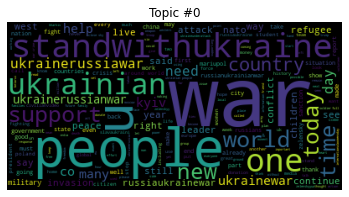

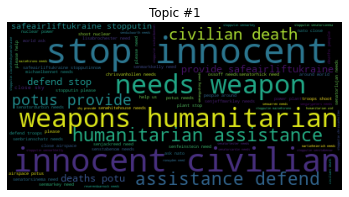

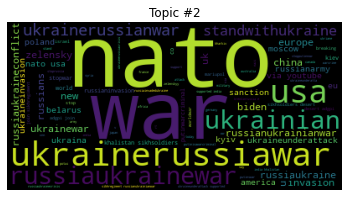

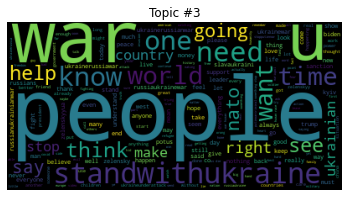

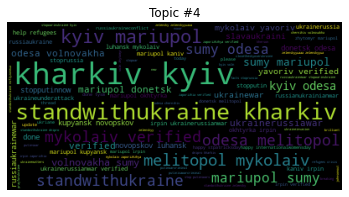

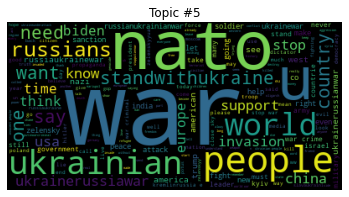

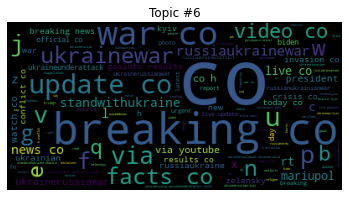

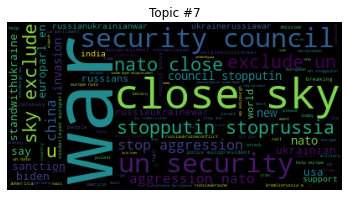

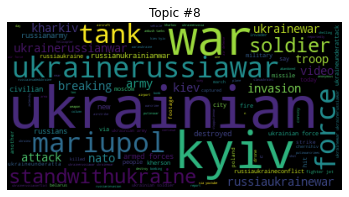

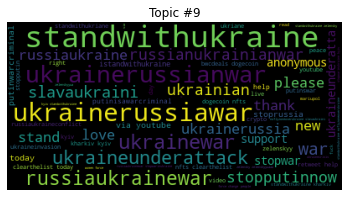

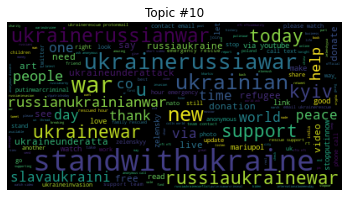

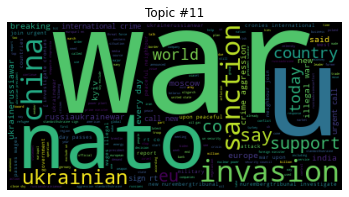

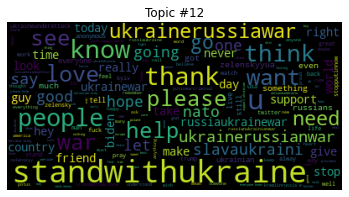

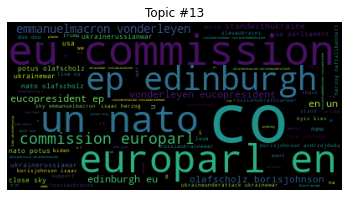

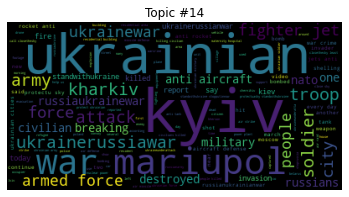

In [38]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")
STOPWORDS=STOPWORDS+["russia","ukraine","russian","putin"]
pattern = re.compile(r"\b(" + r"|".join(STOPWORDS) + r")\b\s*")

from wordcloud import WordCloud
df["tweet"]=df["tweet"].astype(str)
for t in range(15):
    col=df[df.topic_cluster==t].tweet
    text = " ".join(tweet.lower() for tweet in col)
    text = pattern.sub("", text)
    plt.figure()
    plt.imshow(WordCloud().generate(text))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [39]:
#!pip install pysentimiento

In [41]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="en")

Downloading:   0%|          | 0.00/515M [00:00<?, ?B/s]

In [78]:
x=analyzer.predict("what a great player is Messi")

In [79]:
x

AnalyzerOutput(output=POS, probas={POS: 0.992, NEU: 0.006, NEG: 0.002})

In [80]:
x.probas["POS"]

0.991806149482727

In [59]:
df_putin=df[["putin" in tweet.lower() for tweet in df.tweet]]

In [62]:
for i in df_putin.tweet[:10]:
    print(i)
    print("\n")

fuck putin war putinswar http


evil is here with new nft if you think you are bad then i am your dad this nft shows this attitude nftart nftsale ad nftviral nftartist nftcommmunity openseanft muskvsputin putin check out my nft listing on opensea http via opensea


civilians have died in mariupol in putinswar on ukraine around hundred aviation bombs dropped on the city residential areas


it isn t enough to grind mariupol to rubble now the treacherous putinwarcriminal s military has bombed an art school with people inside seeking shelter from the carnage and russianarmy is taking ukrainians back to russia to concentration camps this is bullshit


senmarkey ukraine needs weapons and humanitarian assistance to defend against putin stop innocent civilian deaths potus provide safeairliftukraine


breaking the kremlin putin signs a decree on taking special economic measures against washington and the countries that joined it ukraine russia follow sky earth


find the differences ukraineruss

In [63]:
df_zele=df[["zelensky" in tweet.lower() for tweet in df.tweet]]

In [64]:
for i in df_zele.tweet[:10]:
    print(i)
    print("\n")

the ukraine president zelensky rejected u s offer to evacuate him from kyiv washington post ukriane russia zelenskiy washingtonpost http


find the differences ukrainerussiawar freepalestine zelensky bennett biden bidenswar putinswar russiaukrainewar http


maryfakhar maryam rajavi kiraincongress ukraine russiaukrainewar stopwarinukraine kyiv standwithukraine zelensky zelenskyyuaaa zelenskyyua


meet the leader of the free world zelensky standwithukraine http


olgatokariuk absolutely remember how republicans were calling zelensky a thug a drug dealer a corrupt leader during tfg s impeachment hearings why does it take threat of nuclear disaster to force these media companies to do the right thing zelensky gop


zelenskyyua plz understand nato usa no body will come to help they want ukraine to fight till last man standing where are the sanction till date even swift not implemented usa sanction on oil gas make no sense becoz they export britain will stop by end of


prediction nestle wil

In [77]:
def sentiment_tweet_positive(text):
    sentiment=analyzer.predict(text)
    return sentiment.probas["POS"]

def sentiment_tweet_negative(text):
    sentiment=analyzer.predict(text)
    return sentiment.probas["NEG"]

In [82]:
putin=df_putin.iloc[:1000,:]
zeln=df_zele.iloc[:1000,:]

In [83]:
putin

,tweet,topic_cluster
727255,fuck putin war putinswar http,9
1550751,evil is here with new nft if you think you are...,12
1402926,civilians have died in mariupol in putinswar o...,14
1914165,it isn t enough to grind mariupol to rubble no...,0
548100,senmarkey ukraine needs weapons and humanitari...,1
...,...,...
1514303,oil price is set at the barrel by opec putin a...,11
1951809,oh dear we need to step up supportukraine nato...,12
579800,now russia fires on nuclear power plant in ukr...,11
368989,who lost ukrainerussiawar putinwarcriminal http,9


In [87]:
print(putin.shape,zeln.shape)

putin["positive"]=putin.tweet.apply(sentiment_tweet_positive)
putin["negative"]=putin.tweet.apply(sentiment_tweet_negative)

zeln["positive"]=zeln.tweet.apply(sentiment_tweet_positive)
zeln["negative"]=zeln.tweet.apply(sentiment_tweet_negative)

(1000, 4) (1000, 4)


<ipython-input-87-32a4071abaec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  putin["positive"]=putin.tweet.apply(sentiment_tweet_positive)
<ipython-input-87-32a4071abaec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  putin["negative"]=putin.tweet.apply(sentiment_tweet_negative)
<ipython-input-87-32a4071abaec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [88]:
putin.describe()

,topic_cluster,positive,negative
count,1000.000000,1000.000000,1000.000000
mean,6.342000,0.041467,0.589954
std,4.056043,0.145307,0.374533
min,0.000000,0.002671,0.000706
25%,3.000000,0.003297,0.206716
50%,5.000000,0.005561,0.736583
75%,10.000000,0.011977,0.945388
max,14.000000,0.990232,0.985698


In [89]:
zeln.describe()

,topic_cluster,positive,negative
count,1000.000000,1000.000000,1000.000000
mean,6.021000,0.104295,0.397467
std,4.072978,0.244245,0.400622
min,0.000000,0.002663,0.000697
25%,3.000000,0.003945,0.009862
50%,5.000000,0.009131,0.217371
75%,10.000000,0.035872,0.862659
max,14.000000,0.989645,0.985819
